# GRAMENER CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the base dataframe from the loan data
df = pd.read_csv("loan.csv", low_memory=False)

################### Cleaning up the unnecessary Data ##########################
# Remove all the columns after 42(retaing column 105) as the data mostly seems to be n/a or 0.
# We will not be able to derive any insights out of those columns.
df = df.iloc[:, np.r_[:42,105]]

# From the list of columns we got, removing further more columns that are unnecessary. 
# This will help increase the performance of the code.
df.drop(['member_id', 'zip_code', 'title', 'desc', 'pymnt_plan', 'emp_title', 'out_prncp_inv', 'out_prncp', 'initial_list_status'], 1, inplace=True)

# remove % in int_rate to use it for analysis
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

# remove % in revol_util to use it for analysis
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

# Remove all the n/a value in employee work experience and replace with 0
df.replace('n/a', np.nan, inplace=True)
df.emp_length.fillna(value=0, inplace=True)

# Convert the emp length to int type for analysis
df['emp_length'].replace(to_replace='[^0-9]', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

# Final number of columns after cleanup. 
# We have 34 columns for analysis
print(df.columns)
print(df.shape)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'pub_rec_bankruptcies'],
      dtype='object')
(39717, 34)


## UNIVARIATE ANALYSIS

In [2]:
################### Categorical Variables and Ordered Categorical Values ################################

# List of columns for which we would like to do univariate analysis
categorized_cols = ['grade', 'home_ownership', 'purpose', 'loan_status', 'emp_length']

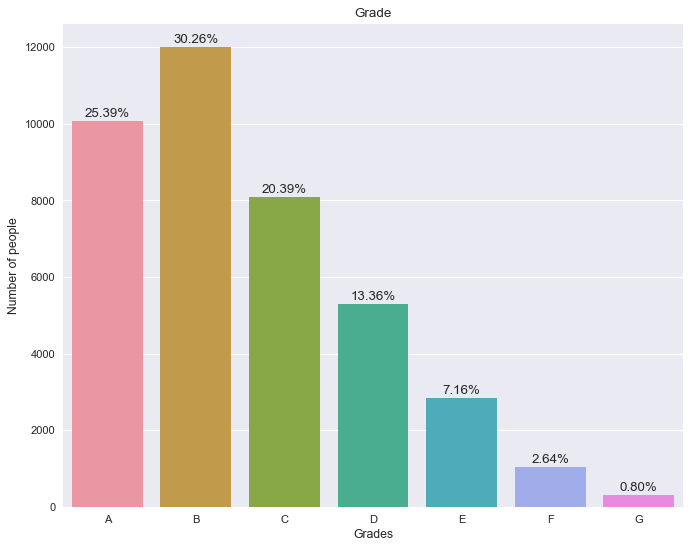

In [3]:
# Grade analysis report
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=df.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x=df[categorized_cols[0]].sort_values())
plt.ylabel('Number of people')
plt.xlabel('Grades')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
title = categorized_cols[0].capitalize()
plt.title(title) 
plt.show()

# Outcome: Percentage of people under Grade A and B accounts to half the number of applicants

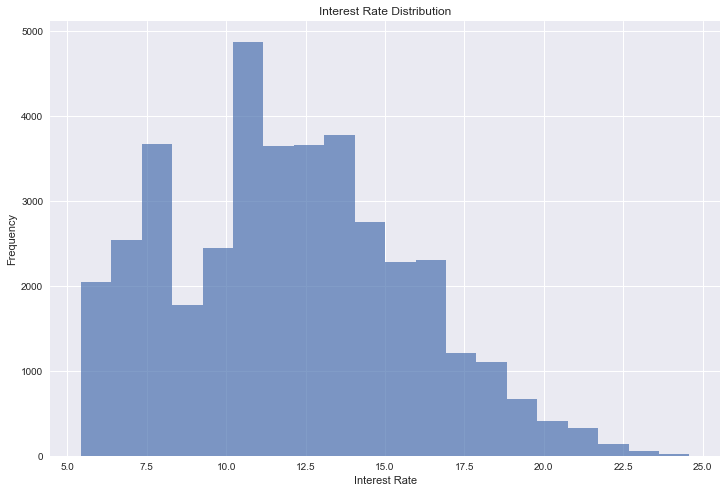

In [4]:
# Interest Rate Distribution analysis to see where the interest rates are predominantly present
y = df.int_rate.values
pd.Series(y).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution',figsize=(12,8),grid=True)
sns.set()
plt.xlabel('Interest Rate')
plt.show()

# Outcome: Interest distribution signifies that the percentage is more concentrated between 10 and 14.

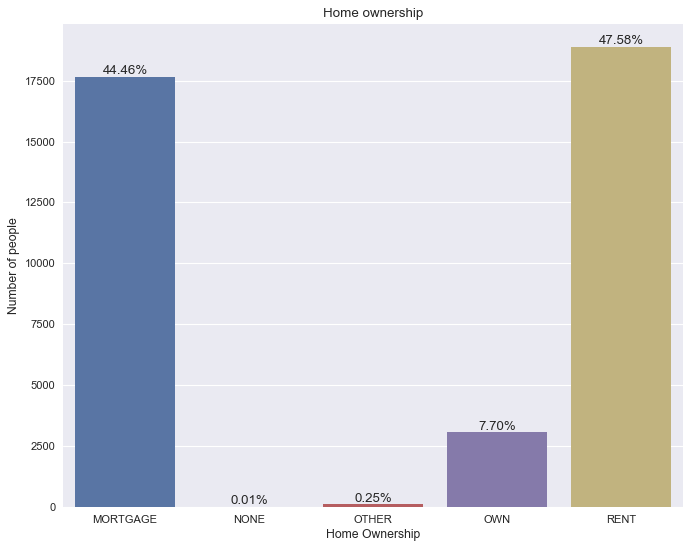

In [5]:
# Home Ownership analysis report
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=df.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x=df[categorized_cols[1]].sort_values())
plt.ylabel('Number of people')
plt.xlabel('Home Ownership')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
title = categorized_cols[1].capitalize()
title=title.replace('_',' ')
plt.title(title) 
plt.show()

# Outcome: Mortgage and Rent in Home ownership accounts for almost 90% of the applicants.

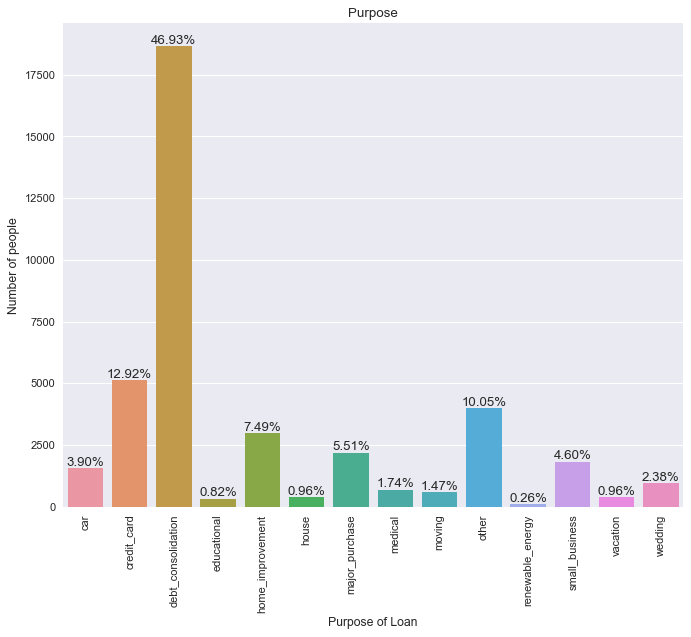

In [6]:
# Purpose of loan analysis report
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=df.id.count()
plt.xticks(rotation=90)
sns.set(style="darkgrid")
ax=sns.countplot(x=df[categorized_cols[2]].sort_values())
plt.ylabel('Number of people')
plt.xlabel('Purpose of Loan')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
title = categorized_cols[2].capitalize()
title=title.replace('_',' ')
plt.title(title) 
plt.show()

# Outcome: It is very evident that half of the applicants applied for consolidating their debt.

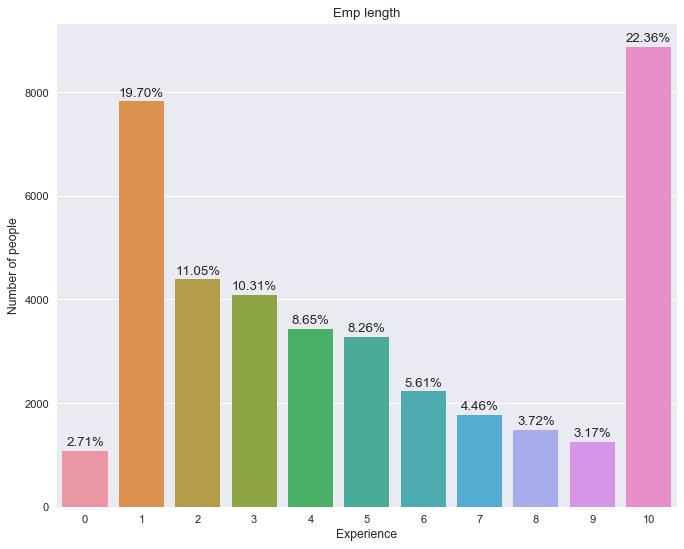

In [7]:
# Employee length analysis report
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
total=df.id.count()
sns.set(style="darkgrid")
ax=sns.countplot(x=df[categorized_cols[4]].sort_values())
plt.ylabel('Number of people')
plt.xlabel('Experience')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format((height/total)*100),
            ha="center",)
title = categorized_cols[4].capitalize()
title=title.replace('_',' ')
plt.title(title) 
plt.show()

# Outcome: We observe that loan trend gets downward with work experience from 1 to 9 years.However it is the highest 
# with respect to people with and above 10 years of experience.

## CORRELATION MATRIX

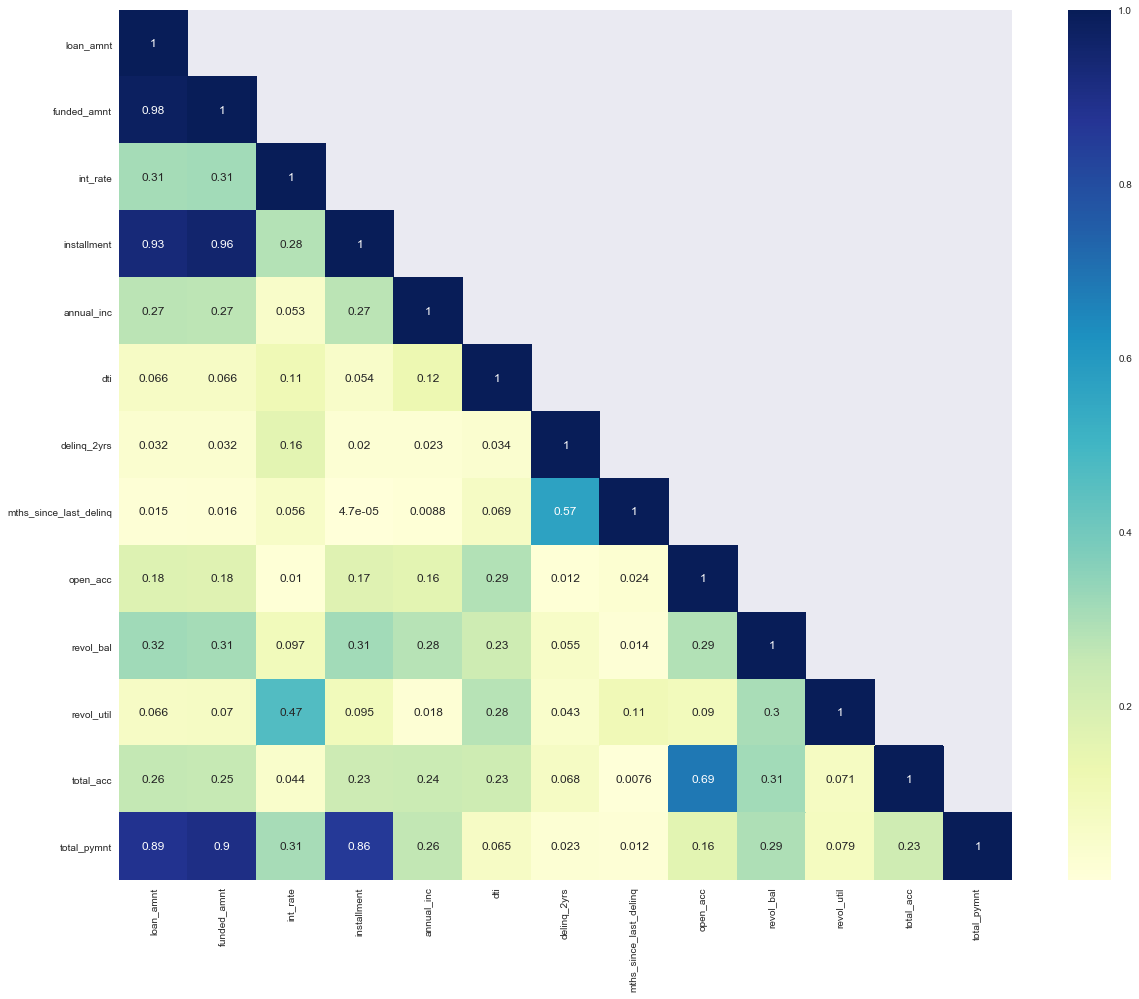

In [8]:
# Removing unwanted columns from the DataFrame to create a correlation matrix and further process the bivariate analysis
corrdf = df.drop(['id','funded_amnt_inv','term','sub_grade','home_ownership','total_rec_prncp', \
                  'total_rec_int', 'issue_d', 'addr_state', 'purpose','url','grade','earliest_cr_line', \
                  'loan_status','total_pymnt_inv', 'emp_length', 'pub_rec','mths_since_last_record',\
                  'inq_last_6mths','pub_rec_bankruptcies'],axis=1)

corr = corrdf.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)] = True
plt.figure(figsize=(20,16))
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

# Outcome:
# High Correlation: 
#     funded_amnt and Loan_amnt
#     installment and Loan_amnt
#     total_acc and open_acc

# Medium Correlation:
#     revol_util and int_rate
#     mths_since_last_delinq and delinq_2yrs

## BIVARIATE ANALYSIS

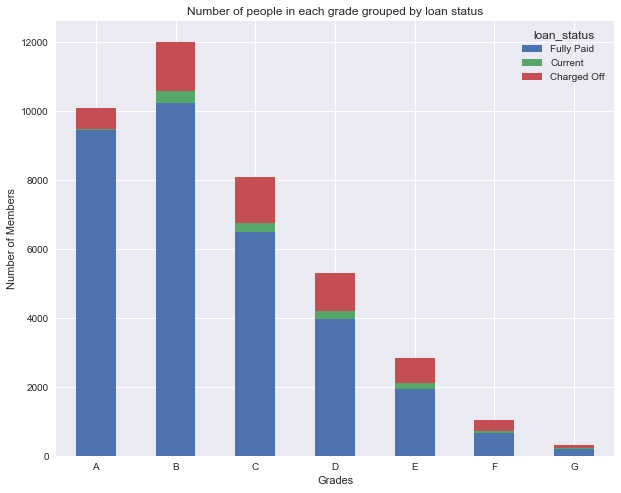

In [9]:
# Loan_status vs Grade analysis (Count Plot)

df_loan_grade = df[['grade', 'loan_status']]
df_loan_grade = df_loan_grade.groupby(['grade','loan_status'])
df_loan_grade.size().unstack().reindex(columns=['Fully Paid', 'Current', 'Charged Off']).plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Grades')
plt.ylabel('Number of Members')
plt.xticks(rotation=0)
plt.title('Number of people in each grade grouped by loan status')
plt.show()

# Outcome: This gives an understanding of the defaulters for each grade

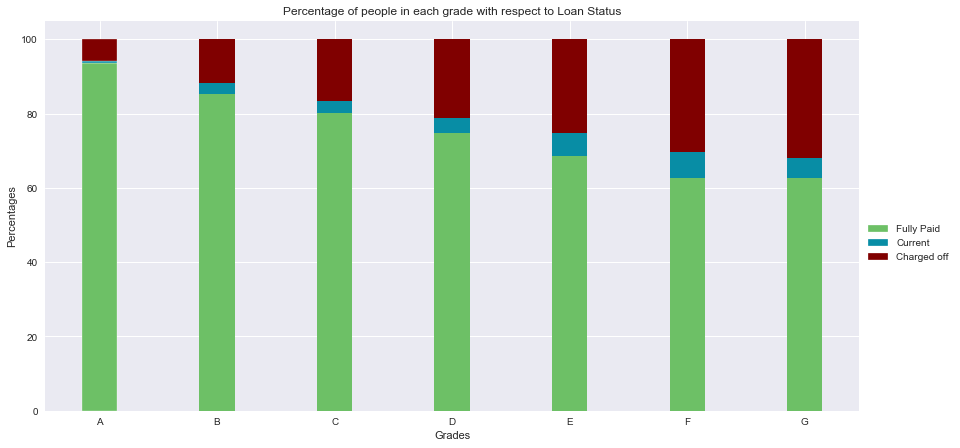

In [10]:
# Loan_status vs Grade analysis (Percentage of count plot)
percentage = df_loan_grade.size().unstack()

totals = percentage['Charged Off']+percentage['Current']+percentage['Fully Paid']
charged_off = (percentage['Charged Off']/totals)*100
Current = (percentage['Current']/totals)*100
Fully_Paid = (percentage['Fully Paid']/totals)*100

# Plot
barWidth = 0.3
names = ('A','B','C','D','E','F','G')
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.set(style="darkgrid")
p1 = plt.bar(names, Fully_Paid, color='#6dc066', edgecolor='white', width=barWidth)
p2 = plt.bar(names, Current, bottom=Fully_Paid, color='#088da5', edgecolor='white', width=barWidth)
p3 = plt.bar(names, charged_off, bottom=[i+j for i,j in zip(Fully_Paid, Current)], color='#800000', edgecolor='white', width=barWidth)
plt.legend((p1[0], p2[0],p3[0]), ('Fully Paid', 'Current', 'Charged off'), loc='upper left',bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.title('Percentage of people in each grade with respect to Loan Status')
plt.ylabel("Percentages")
plt.xlabel("Grades")
plt.show()

# Outcome: The percentage of people getting default increases gradually through the grade.
# This implies that higher the grade, there are more chances of applicant getting default.

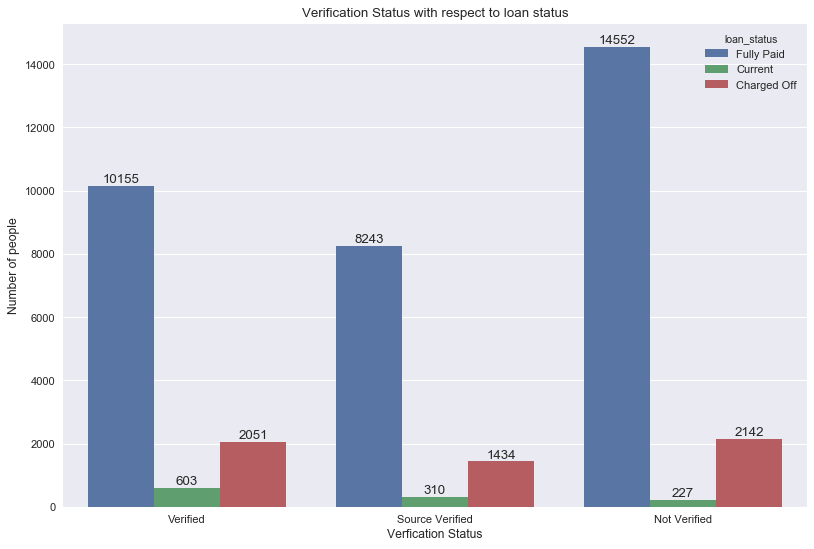

In [11]:
# Verification Status vs loan status (Count plot)
sns.set(style='darkgrid')
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
ax=sns.countplot(x='verification_status', hue='loan_status', data=df, hue_order=['Fully Paid','Current','Charged Off'])
plt.ylabel('Number of people')
plt.xlabel('Verfication Status')
for p in ax.patches:
    height = p.get_height()
    if (height/total)>0:
        ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1}'.format((height)),
            ha="center")
plt.title('Verification Status with respect to loan status')
plt.show()

In [12]:
# Verification Status vs loan status (Analysis)

df_loan_verstat = df[['verification_status', 'loan_status']]
df_loan_verstat = df_loan_verstat.groupby(['verification_status','loan_status'])

loan_verstat_percentage = df_loan_verstat.size().unstack()
totals = loan_verstat_percentage['Charged Off']+loan_verstat_percentage['Current']+loan_verstat_percentage['Fully Paid']
charged_off = (loan_verstat_percentage['Charged Off']/totals)*100

print(charged_off)

# Outcome: We could see that the number of defaulters is on the higher side for Verified.
# There is need to improve the verification process such that the defaulters can be reduced.

verification_status
Not Verified       12.658826
Source Verified    14.358666
Verified           16.012179
dtype: float64


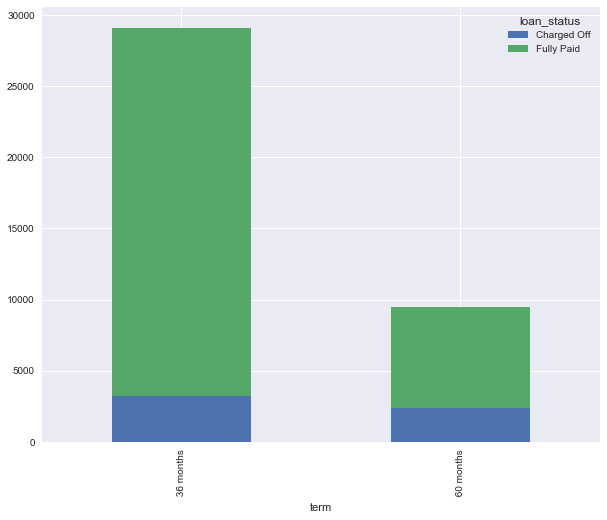

In [13]:
# Loan_status vs Term analysis (Count Plot)
df_loan_term = df[['term', 'loan_status']]

# Since there is no 'current' loan status under 36 months, removing it from the dataframe
df_loan_term = df_loan_term.loc[(df_loan_term.loan_status != "Current"), :]
df_loan_term = df_loan_term.groupby(['term', 'loan_status'])

df_loan_term.size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))
sns.set(style="darkgrid")
plt.show()

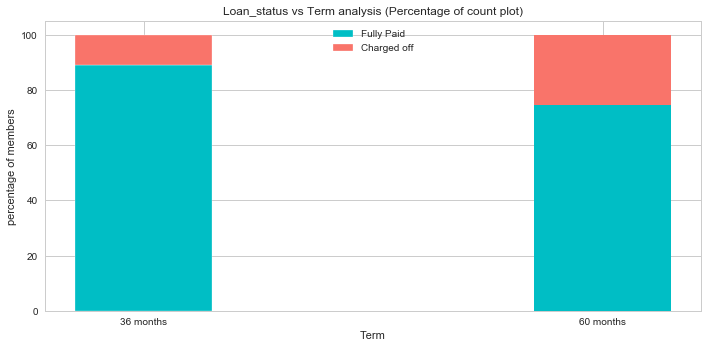

In [14]:
# Loan_status vs Term analysis (Percentage of count plot)
percentage = df_loan_term.size().unstack()
totals = percentage['Charged Off'] + percentage['Fully Paid']

charged_off = (percentage['Charged Off']/totals)*100
Fully_Paid = (percentage['Fully Paid']/totals)*100

# plot
barWidth = 0.30
names = ('36 months','60 months')
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.set(style="whitegrid")

p1 = plt.bar(names, Fully_Paid, color='#00BEC5', edgecolor='white', width=barWidth)
p2 = plt.bar(names, charged_off, bottom=Fully_Paid, color='#F9746A', edgecolor='white', width=barWidth)
plt.xlabel("Term")
plt.ylabel("percentage of members")
plt.title("Loan_status vs Term analysis (Percentage of count plot)")
plt.legend((p1[0], p2[0]), ('Fully Paid', 'Charged off'), loc='upper center')
plt.tight_layout()
plt.show()

# Outcome: There seems to be more defaulters when the loan is taken for 60 months

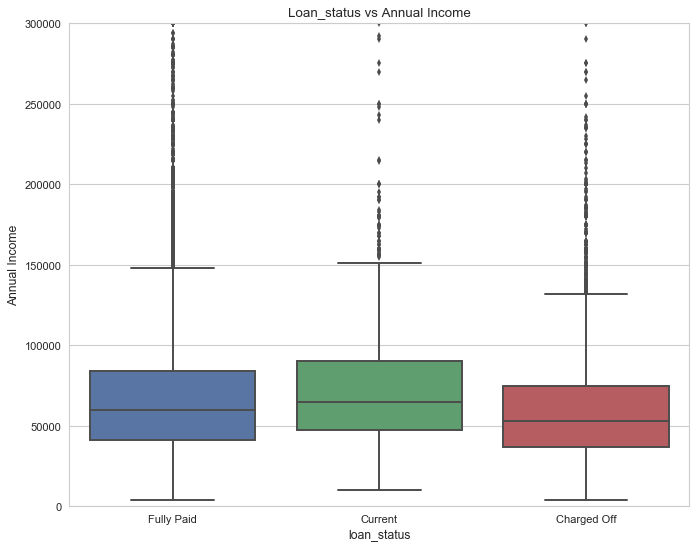

In [15]:
# Loan_status vs Annual Income (Box Plot)
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w',edgecolor='k')
plt.tight_layout()
plt.ylim(0, 300000) #Limiting it to an upper value
sns.boxplot(x="loan_status", y="annual_inc", data=df, order =['Fully Paid','Current','Charged Off'])
plt.title('Loan_status vs Annual Income')
plt.ylabel("Annual Income")
plt.show()

# Outcome: It is very evident that the applicants who gets defaulted are having median salary much lower than others.
# So business should be much careful while approving loans for lower income people.

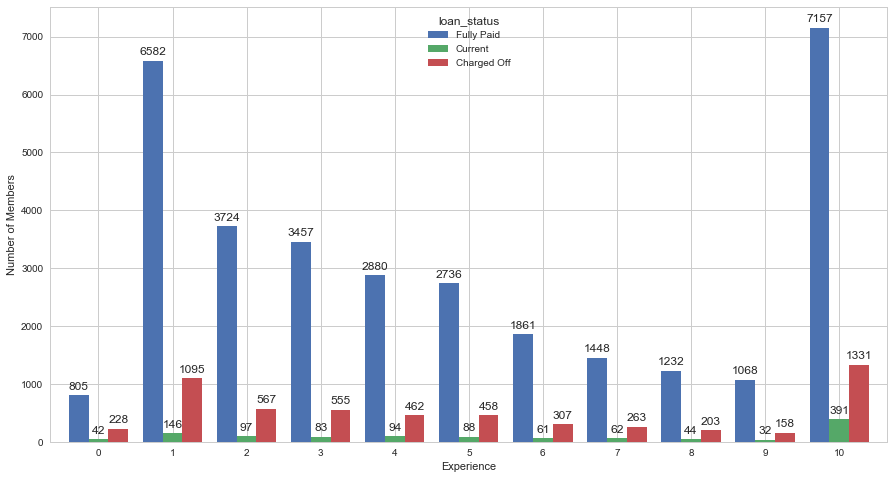

In [16]:
# Emp length vs Loan Status(Count Plot)
df_loan_term = df[['emp_length', 'loan_status']]
df_loan_term = df_loan_term.groupby(['emp_length', 'loan_status'])
#print(df_loan_term.size().unstack().reindex(['Fully Paid','Charged Off','Current'], axis=1))
ax=df_loan_term.size().unstack().reindex(columns=['Fully Paid', 'Current', 'Charged Off']).plot(kind='bar', stacked=False, figsize=(15, 8),width=0.8)
plt.xlabel("Experience")
plt.ylabel("Number of Members")
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1}'.format((height)),
            ha="center",)
plt.show()
#Outcome 1:The total number of defaulters with 1 year and No work experince is 1323
#Outcome 2:The total number of defaulters with 10 and 10 + years of experience are 1331 
#which is pretty close to Outcome 1 value
#Outcome 3: The trend of defaulters is lowering when we take the set of 1-9 years of work experience and it suddenly increases\
#in the case of 10 and 10+ years of work experienced members

In [17]:
# Emp length vs Loan Status(Analysis)
df_loan_term_percentage = df_loan_term.size().unstack()

totals = df_loan_term_percentage['Charged Off']+ df_loan_term_percentage['Current']+ df_loan_term_percentage['Fully Paid']
charged_off = (df_loan_term_percentage['Charged Off']/totals)*100

print(charged_off)
#Below are the percentages of charged off people in each Work experience category

emp_length
0     21.209302
1     13.997188
2     12.921604
3     13.553114
4     13.445867
5     13.954906
6     13.772992
7     14.833615
8     13.725490
9     12.559618
10    14.990427
dtype: float64


## Derived Metrics

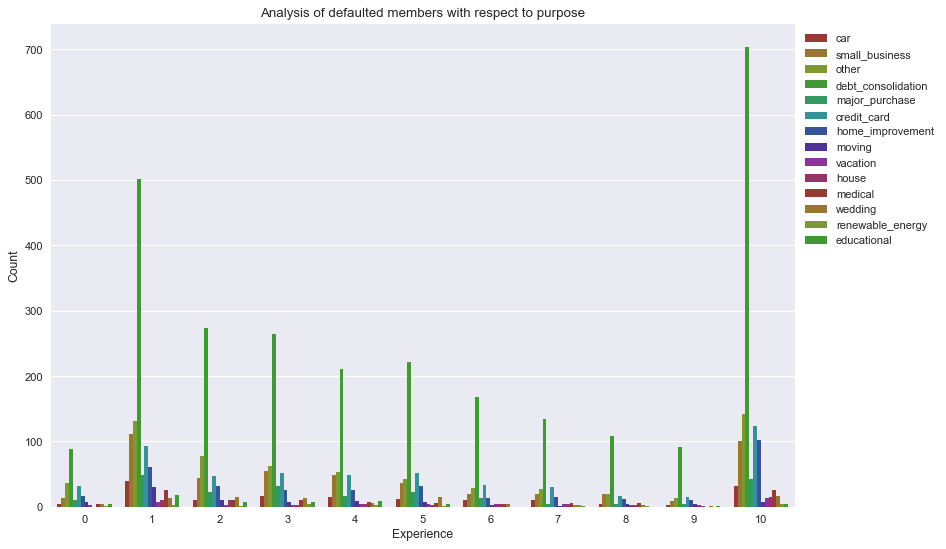

In [18]:
#Finding out the purpose of loan among defaulters with regards to their work experience
df_loan_charged_off=df.loc[(df['loan_status']=='Charged Off')]
df_loan_charged_off=df_loan_charged_off.reset_index()
df_loan_charged_off=df_loan_charged_off[['emp_length','purpose']]
df_loan_charged_off
df_loan_charged_off=df_loan_charged_off.reset_index()
palette=sns.hls_palette(10,l=0.4)
sns.set(style='darkgrid')
plt.figure(num=None, figsize=(12,8),dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
ax=sns.countplot(x='emp_length',hue='purpose',palette=palette,data=df_loan_charged_off)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.title('Analysis of defaulted members with respect to purpose')
plt.ylabel('Count')
plt.xlabel('Experience')
plt.show()
#Outcome:
#Among the defaulted members a high number of members have taken loans for debt consolidation for 1 year experienced 
#and 10+ year experienced people.
#'Other' purposes are defined as the second most occuring 'purpose' for 1 year experienced and 10+ year experienced people.
#Credit Card,Home improvement and Small business are big contributor purposes to charge offs in the case of 10 +year
#experienced people.